In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

X_train = pd.read_csv('../data/processed/X_train_apartment.csv')
y_train = pd.read_csv('../data/processed/y_train_apartment.csv')
X_test = pd.read_csv('../data/processed/X_test_apartment.csv')
y_test = pd.read_csv('../data/processed/y_test_apartment.csv')

In [2]:
X_train.shape

(6857, 26)

In [3]:
y_train.shape

(6857, 1)

In [4]:
X_test.shape

(1814, 26)

In [5]:
y_test.shape

(1814, 1)

In [6]:
X_train.duplicated().sum()

0

In [7]:
X_test.duplicated().sum()

0

## Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X_train, y_train)


LinearRegression()

In [9]:
train_accuracy = multi_linear_reg.score(X_train, y_train)

train_accuracy

0.6258940740615575

### Test model

In [10]:
# y_pred_train = regressor.predict(X_train)
y_pred_test = multi_linear_reg.predict(X_test)


In [11]:
print(f"y_pred_test {y_pred_test}")
# print(f"y_pred_train {y_pred_train}")

y_pred_test [[ 359059.55503479]
 [ 384629.0870541 ]
 [2089126.09638378]
 ...
 [ 388696.37598063]
 [ 267265.07531112]
 [ 616550.69481974]]


In [12]:
accuracy = multi_linear_reg.score(X_test, y_test)
accuracy

-1.6181366019697525

In [13]:
y_test

,Price
0,398000.0
1,575000.0
2,278000.0
3,395000.0
4,452500.0
...,...
1809,581290.0
1810,376000.0
1811,549000.0
1812,285000.0


In [14]:
y_pred_test

array([[ 359059.55503479],
       [ 384629.0870541 ],
       [2089126.09638378],
       ...,
       [ 388696.37598063],
       [ 267265.07531112],
       [ 616550.69481974]])

In [15]:
for x, y in zip(y_test.values, y_pred_test):
    print(f"{x} - {y}")

[398000.] - [359059.55503479]
[575000.] - [384629.0870541]
[278000.] - [2089126.09638378]
[395000.] - [446544.66956717]
[452500.] - [348677.78227024]
[245500.] - [277195.75991292]
[422613.] - [358787.23414725]
[339000.] - [435124.02809453]
[545000.] - [517091.01405755]
[339000.] - [312935.52847361]
[511983.] - [516470.67206429]
[380000.] - [309517.56794089]
[385000.] - [504384.69776539]
[851000.] - [576389.35737373]
[540000.] - [407439.08220928]
[269793.] - [288484.39762965]
[410000.] - [437147.7560734]
[330000.] - [388254.34833555]
[275000.] - [248807.01455277]
[388000.] - [380066.85757654]
[425000.] - [543297.11817237]
[410000.] - [346240.02678321]
[325000.] - [406786.79101864]
[277000.] - [242848.33285493]
[325455.] - [288038.29024619]
[235000.] - [256547.04553138]
[529000.] - [519406.70636912]
[288019.] - [290929.6998059]
[169000.] - [175724.17262953]
[239000.] - [326370.97272967]
[347629.] - [280247.69464253]
[399000.] - [406348.297397]
[488500.] - [519853.71086198]
[488280.] - [3

In [16]:
X_train.columns

Index(['Facades', 'Habitable Surface', 'Bedroom Count', 'Bathroom Count',
       'Toilet Count', 'Room Count', 'Kitchen Type', 'Furnished', 'Terrace',
       'Terrace Surface', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')

## Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [18]:
ridge_pred = ridge.predict(X_test)

In [19]:
accuracy = ridge.score(X_test, y_test)
accuracy

-1.6201680105431873

## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=100)

In [21]:
lasso_pred = lasso_reg.predict(X_test)

In [22]:
accuracy = lasso_reg.score(X_test, y_test)
accuracy

-1.6443595688053896

## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_y_train = np.ravel(y_train)

random_forest_reg = RandomForestRegressor(n_estimators=400, random_state=42)
random_forest_reg.fit(X_train, rf_y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [24]:
rf_y_pred = random_forest_reg.predict(X_test)

In [25]:
accuracy = random_forest_reg.score(X_test, y_test)
accuracy

0.748835031017623

## Boosting Gradient Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gb_y_train = np.ravel(y_train)

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
gradient_boosting_reg.fit(X_train, gb_y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42)

In [27]:
gb_y_pred = gradient_boosting_reg.predict(X_test)

In [28]:
accuracy = gradient_boosting_reg.score(X_test, y_test)
accuracy

0.7201921089258043

## KNN Regressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [30]:
knn_y_pred = knn_reg.predict(X_test)

In [31]:
accuracy = knn_reg.score(X_test, y_test)
accuracy

0.36907405977226804

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=500)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=500)

In [33]:
tree_y_pred = tree_reg.predict(X_test)

In [34]:
accuracy = tree_reg.score(X_test, y_test)
accuracy

0.3824734265168077

## Histogram Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr_y_train = np.ravel(y_train)

hist_gradient_boosting_reg = HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.1, random_state=42)
hist_gradient_boosting_reg.fit(X_train, hgbr_y_train)

HistGradientBoostingRegressor(random_state=42)

In [36]:
hgbr_y_pred = hist_gradient_boosting_reg.predict(X_train)

In [37]:
accuracy = hist_gradient_boosting_reg.score(X_test, y_test)
accuracy

0.7493211130601007

## XGBoost

In [38]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(learning_rate=0.1, n_estimators=150, booster='dart')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
xgb_y_pred = xgb_reg.predict(X_test)

In [40]:
accuracy = xgb_reg.score(X_test, y_test)
accuracy

0.76150009138713

In [41]:
mse = mean_squared_error(y_test, xgb_y_pred)

In [42]:
mse

3532833607.6648684

In [43]:
X =pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')
scores

array([0.86870423, 0.85009683, 0.84574964, 0.84112238, 0.79797626])

In [45]:
mean_mse = scores.mean()
mean_mse

0.840729867621898

In [46]:
# import pickle
# 
# with open('../models/ap_xgboost_reg.pkl', 'wb') as file:
#     pickle.dump(xgb_reg, file)

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Multiple Linear Regression': multi_linear_reg,
    'Ridge': ridge,
    'Lasso': lasso_reg,
    'Random Forest': random_forest_reg,
    'Gradient Boosting': gradient_boosting_reg,
    'knn': knn_reg,
    'Decision Tree': tree_reg,
    'Histogram Gradient Boosting': hist_gradient_boosting_reg,
    'XGBoost': xgb_reg
}


def create_k_fold_cross_val_df(X: pd.DataFrame, y: pd.DataFrame, models: dict, k_folds: int = 5,
                               score_method: str = 'r2') -> pd.DataFrame:
    df = pd.DataFrame(columns=models.keys(), index=range(k_folds))
    df = df.fillna(np.nan).infer_objects(copy=False)

    y = np.ravel(y)

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=k_folds, scoring=score_method)
        df.loc[:, name] = scores

    return df


cross_val_df = create_k_fold_cross_val_df(X=X, y=y, models=models, k_folds=5, score_method='r2')
cross_val_df

,Multiple Linear Regression,Ridge,Lasso,Random Forest,Gradient Boosting,knn,Decision Tree,Histogram Gradient Boosting,XGBoost
0,-2.596201,-2.598310,-2.631743,0.847727,0.840939,0.558452,0.706798,0.858880,0.868704
1,0.580449,0.580479,0.580905,0.831625,0.829452,0.500194,0.676447,0.846468,0.850097
2,0.590594,0.590605,0.590864,0.832068,0.834418,0.537463,0.661580,0.840826,0.845750
3,0.429260,0.429327,0.429455,0.814903,0.827436,0.479942,0.644920,0.832621,0.841122
4,-2.014971,-2.017145,-2.044564,0.764054,0.755188,0.407691,0.433653,0.775769,0.797976


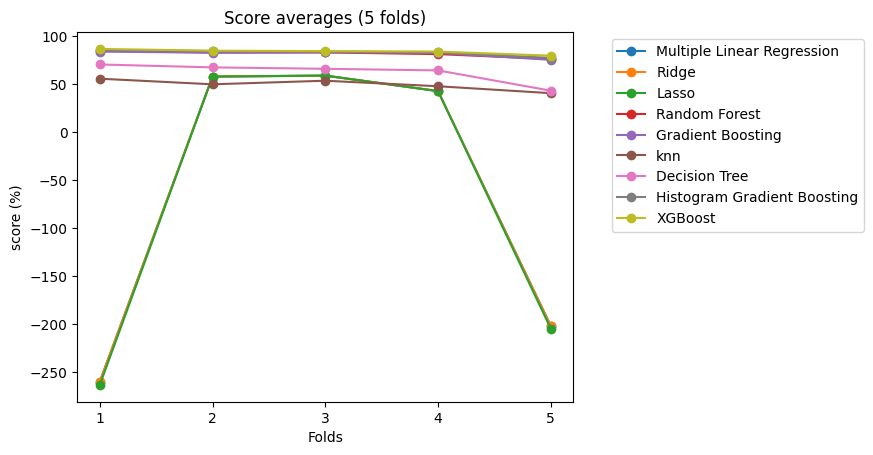

In [48]:
from matplotlib import pyplot as plt


def k_fold_score_linear_plot(df: pd.DataFrame, k_folds: int = 5):
    fig, ax = plt.subplots()

    for model, scores in df.items():
        ax.plot(range(1, k_folds + 1), scores * 100, marker='o', label=model)

    ax.set_xticks(range(1, k_folds + 1))

    ax.set_xlabel('Folds')
    ax.set_ylabel('score (%)')
    ax.set_title(f'Score averages ({k_folds} folds)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

    plt.show()


k_fold_score_linear_plot(cross_val_df, k_folds=5)

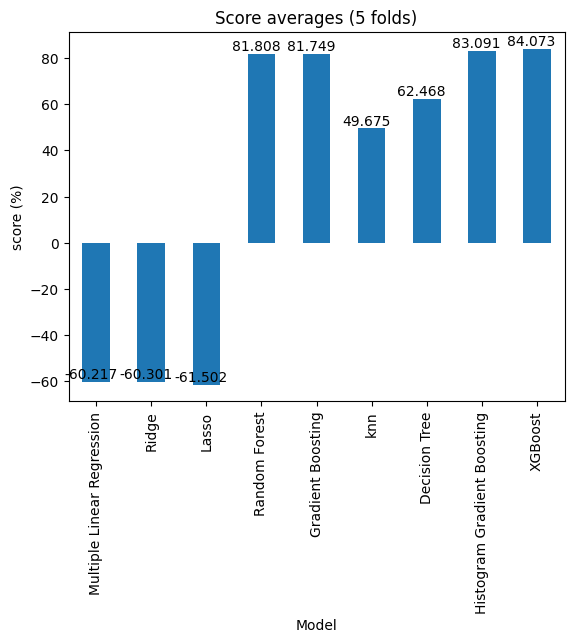

In [49]:
def score_mean_bar_plot(df: pd.DataFrame):
    average = df.mean() * 100

    fig, ax = plt.subplots()

    bars = average.plot(kind='bar', ax=ax)

    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(bar.get_height(), 3),
                ha='center', va='bottom')

    ax.set_xlabel('Model')
    ax.set_ylabel('score (%)')
    ax.set_title(f'Score averages ({len(df)} folds)')

    plt.show()


score_mean_bar_plot(cross_val_df)